SDA Assignment <p>

Below you will find the link to a data file for the EVE instrument, on board of the spacecraft SDO.
https://lasp.colorado.edu/eve/ <p>
This data file contains the ultraviolet spectra obtained from solar observations in 2011-Feb-15, between 00 UT and 01 UT, when a solar flare, class X occurred. <p>
This is one of the many papers studying this event
https://ui.adsabs.harvard.edu/abs/2014ApJ...793...70M/abstract

Using the data provided, and the curve fitting methods you have learned, to obtain the Doppler velocity (with uncertainties!) of a selection of spectral lines, and its time variation during the flare.

1. Present (upload to Moodle) your results in a short report (pdf), briefly explaining your method and results.
2. Reproduce (in your own style) the figure given below.

Some references about spectral line Doppler velocity in solar flares:
https://ui.adsabs.harvard.edu/abs/2009ApJ...699..968M/abstract
https://ui.adsabs.harvard.edu/abs/2016ApJ...816...89P/abstract


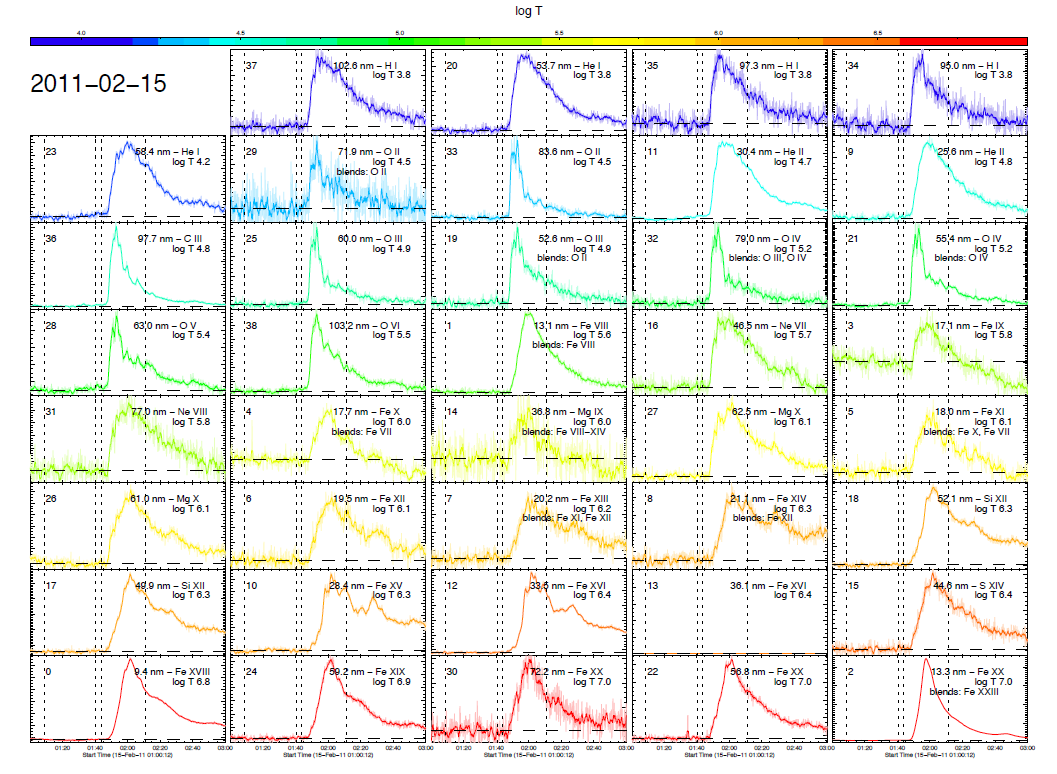

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit

In [6]:
## some solar data now!

## file format: FITS 'Flexible Image Transport System'
## https://fits.gsfc.nasa.gov/

## url for data file

url = 'https://lasp.colorado.edu/eve/data_access/eve_data/products/level2'

year = '2011'
doy = '046'
FITSfile = 'EVS_L2_2011046_00_008_01.fit.gz'
sep = '/'

url_file = sep.join((url,year,doy,FITSfile))

print(url_file)

#####################################################################

## read EVE spectra

def read_eve(FITSfile):
  from astropy.io import fits
  ## open FITS file
  hdu = fits.open(FITSfile)
  ## date
  dat = hdu[3].data['YYYYDOY']
  ## SOD = seconds of day (tempo)
  sod = hdu[3].data['SOD']
  ## array wavelength (comprimento de onda)
  wav = hdu[1].data['WAVELENGTH']
  ## array spectra (irradiance W/m2/nm)
  irr = hdu[3].data['IRRADIANCE'] # time,irr (360,5200)
  hdu.close()
  return wav,sod,irr

#####################################################################

import matplotlib.pyplot as plt
import numpy as np

https://lasp.colorado.edu/eve/data_access/eve_data/products/level2/2011/046/EVS_L2_2011046_00_008_01.fit.gz


In [7]:
def gauss_model(x, amplitude, x0_mean, sigma):
    return amplitude * np.exp(-((x - x0_mean) ** 2) / (2 * sigma ** 2))

5200


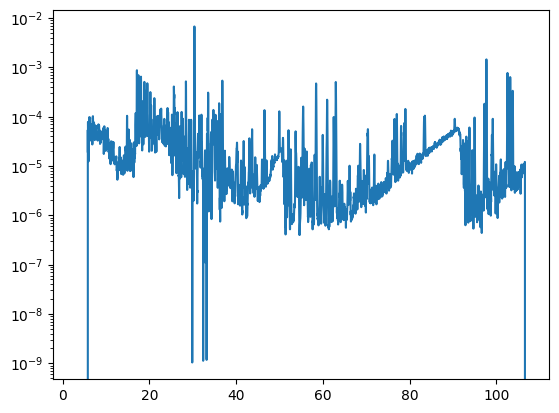

In [16]:
wave_lenght,time_seconds,irradiance = read_eve(url_file)
plt.semilogy(wave_lenght,irradiance[0,:])

print(len(wave_lenght))

(57.9, 58.9)

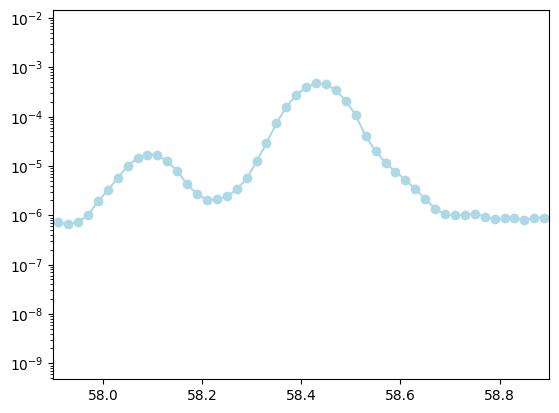

In [17]:
## He I line 58.4nm
line_he_i = 58.4
plt.semilogy(wave_lenght,irradiance[0,:], color="lightblue", marker='o')

plt.xlim(line_he_i-0.5, 
         line_he_i+0.5)

(51.6, 52.6)

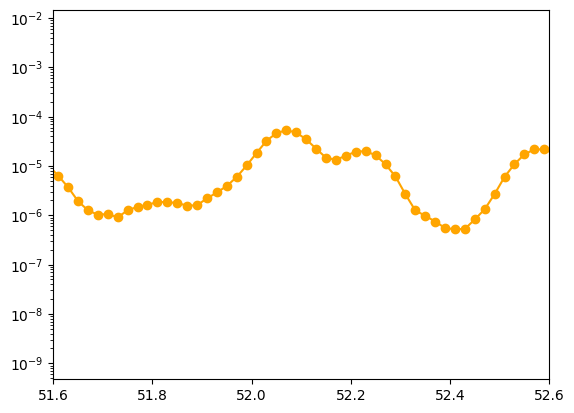

In [18]:
## Si XII line 52.1nm
line_si_xii = 52.1
plt.semilogy(wave_lenght,irradiance[0,:],color ='orange',marker='o')

plt.xlim(line_si_xii-0.5, 
         line_si_xii+0.5)

(58.7, 59.7)

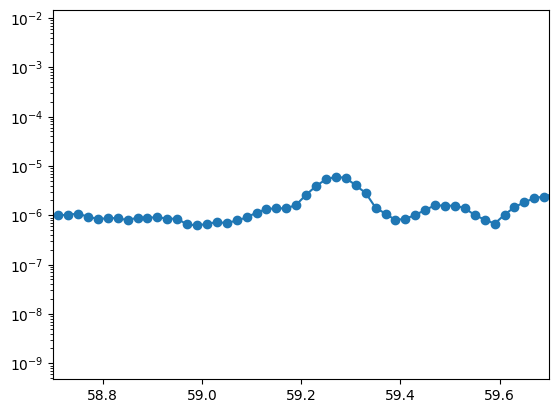

In [19]:
## Fe XIX line 59.2nm
line_fe_xix = 59.2
plt.semilogy(wave_lenght,irradiance[0,:],marker='o')

plt.xlim(line_fe_xix-0.5, 
         line_fe_xix+0.5)

In [20]:
def find_nearest(array,value):
  return np.abs(array-value).argmin()

2770 58.41


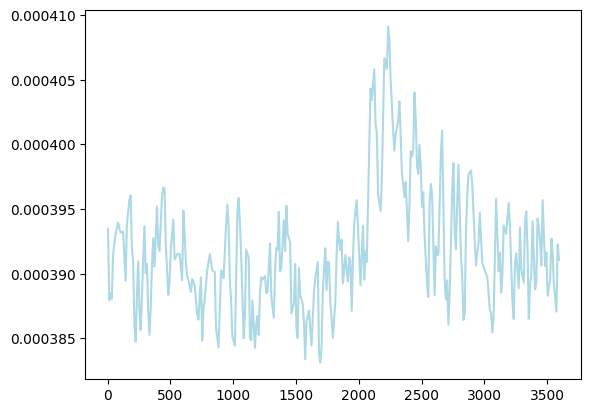

In [21]:
# wave_lenght,time_seconds,irradiance 

index_he_i = find_nearest(wave_lenght,line_he_i)
print(index_he_i,wave_lenght[index_he_i])

## show the time series of the spectral point
plt.plot(time_seconds, irradiance[:,index_he_i], color="lightblue")

2454 52.09


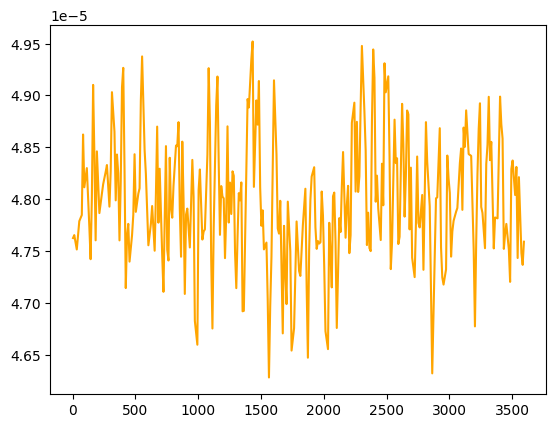

In [22]:
index_si_xii = find_nearest(wave_lenght,line_si_xii)
print(index_si_xii,wave_lenght[index_si_xii])

## show the time series of the spectral point
plt.plot(time_seconds,irradiance[:,index_si_xii], color = "orange")

2810 59.21


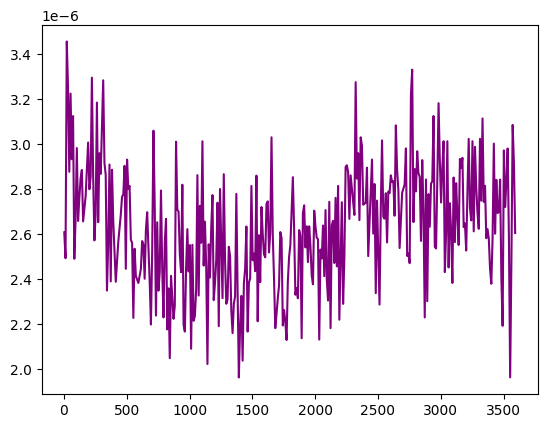

In [24]:
index_fe_xix = find_nearest(wave_lenght,line_fe_xix)
print(index_fe_xix,wave_lenght[index_fe_xix])

## show the time series of the spectral point
plt.plot(time_seconds,irradiance[:,index_fe_xix], color = "purple")

# Helio -> He I line 58.4nm

In [25]:
w = line_he_i
index = find_nearest(wave_lenght,w)

# encontra o indice maximo de irradiacao pra esse comprimento de onda
irradiancia_maxima = irradiance[:,index].argmax()
print(irradiancia_maxima)

223


0.17217432
55.0


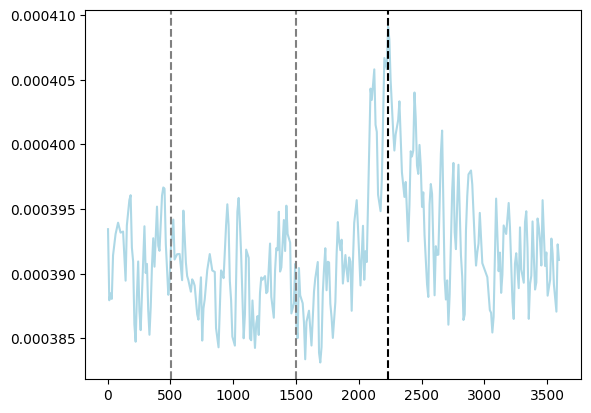

In [26]:
## background interval (index)
inicio_intervalo = find_nearest(time_seconds,500)
final_intervalo = find_nearest(time_seconds,1500)

##############################

media_intervalo = irradiance[inicio_intervalo:final_intervalo,:].mean(axis=0)
desvio_padrao_intervalo = irradiance[inicio_intervalo:final_intervalo,:].std(axis=0)

plt.plot(time_seconds,irradiance[:,index], color = "lightblue")

plt.axvline(time_seconds[inicio_intervalo],linestyle='dashed',color='gray')
plt.axvline(time_seconds[final_intervalo],linestyle='dashed',color='gray')
plt.axvline(time_seconds[irradiancia_maxima],linestyle='dashed',color='k')

print(irradiance.std())
print(wave_lenght.mean())

0.10954438
58.390003


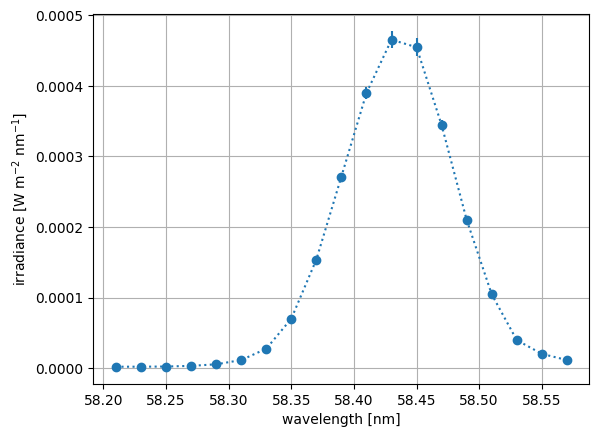

In [27]:
dw = 0.2 #PERGUNTAR PRO PROFESSOR O QUE É ISSO 

i1 = find_nearest(wave_lenght,w-dw)
i2 = find_nearest(wave_lenght,w+dw)
plt.plot(wave_lenght[i1:i2],media_intervalo[i1:i2],marker='o',linestyle='dotted')
# plt.xlim(w-0.2,w+0.2)
plt.errorbar(wave_lenght[i1:i2],media_intervalo[i1:i2],3*desvio_padrao_intervalo[i1:i2],fmt='none')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'irradiance [W m$^{-2}$ nm$^{-1}$]')
plt.grid()


print(wave_lenght[i1:i2].std())
print(wave_lenght[i1:i2].mean())

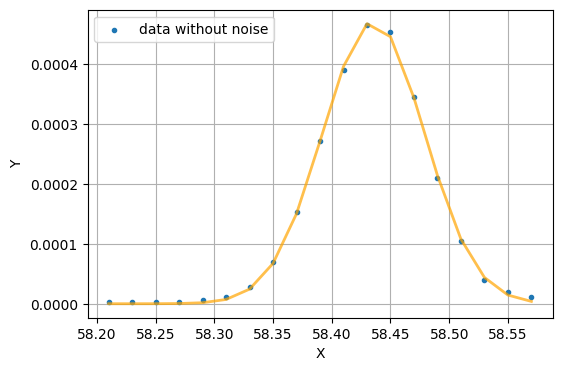

In [28]:
# amplitude, mean, stddev

p0 = [1, 58.390003, 0.10954]

# Suposição de incerteza para os dados (não alterada)
#sigma = y * 0  # incertezas zeradas (zero ou 1)

# Ajuste da curva usando a função gaussiana
parametros_ajustados, matriz_covariancia = curve_fit(gauss_model, wave_lenght[i1:i2],media_intervalo[i1:i2], p0=p0, maxfev = 5000)

# Obter incertezas nos parâmetros ajustados
perr = np.sqrt(np.diag(matriz_covariancia))

# Modelo ajustado usando os parâmetros ajustados
f_model = gauss_model(wave_lenght[i1:i2], parametros_ajustados[0], parametros_ajustados[1], parametros_ajustados[2])

###############################################################################

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# Dados sem ruído
ax.scatter(wave_lenght[i1:i2], media_intervalo[i1:i2], zorder=2, label='data without noise', marker='.')

# Modelo ajustado
ax.plot(wave_lenght[i1:i2], f_model, color='orange', alpha=0.7, linewidth=2)

# Label mostrando os parâmetros ajustados
label = 'Amplitude={:3.2f}'.format(parametros_ajustados[0]) + '\nMédia={:3.2f}'.format(parametros_ajustados[1])
label += '\nstddev={:3.2f}'.format(parametros_ajustados[2])
ax.annotate(label, (0.7, 1.1))

ax.legend()
plt.show()

# Silício -> XII line 52.1nm

In [128]:
w = line_si_xii
index = find_nearest(wave_lenght,w)

# encontra o indice maximo de irradiacao pra esse comprimento de onda
irradiancia_maxima = irradiance[:,index].argmax()
print(irradiancia_maxima)

irradiancia_maxima = 230

143


0.17217432
55.0


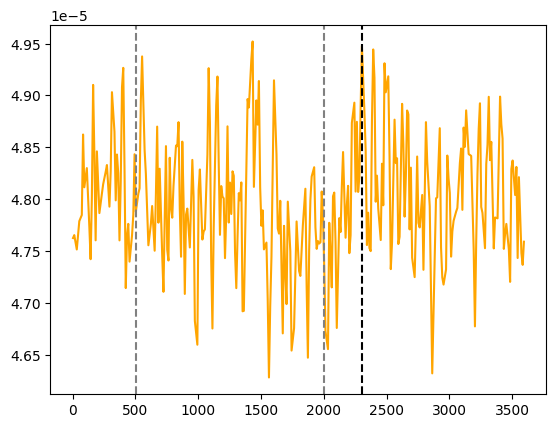

In [130]:
## background interval (index)
inicio_intervalo = find_nearest(time_seconds,500)
final_intervalo = find_nearest(time_seconds,2000)

##############################

media_intervalo = irradiance[inicio_intervalo:final_intervalo,:].mean(axis=0)
desvio_padrao_intervalo = irradiance[inicio_intervalo:final_intervalo,:].std(axis=0)

plt.plot(time_seconds,irradiance[:,index], color = "orange")

plt.axvline(time_seconds[inicio_intervalo],linestyle='dashed',color='gray')
plt.axvline(time_seconds[final_intervalo],linestyle='dashed',color='gray')
plt.axvline(time_seconds[irradiancia_maxima],linestyle='dashed',color='k')

print(irradiance.std())
print(wave_lenght.mean())

0.051640302
52.09


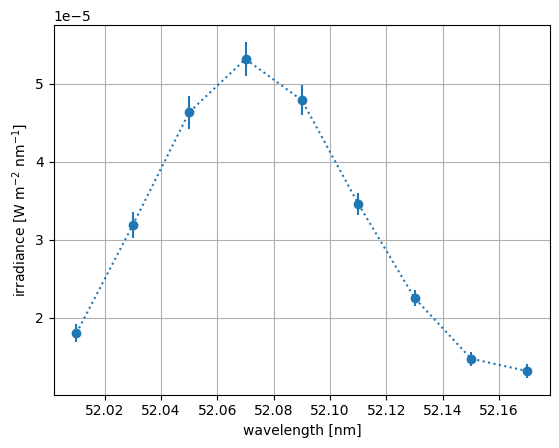

In [131]:
dw = 0.09

i1 = find_nearest(wave_lenght,w-dw)
i2 = find_nearest(wave_lenght,w+dw)
plt.plot(wave_lenght[i1:i2],media_intervalo[i1:i2],marker='o',linestyle='dotted')
# plt.xlim(w-0.2,w+0.2)
plt.errorbar(wave_lenght[i1:i2],media_intervalo[i1:i2],3*desvio_padrao_intervalo[i1:i2],fmt='none')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'irradiance [W m$^{-2}$ nm$^{-1}$]')
plt.grid()


print(wave_lenght[i1:i2].std())
print(wave_lenght[i1:i2].mean())

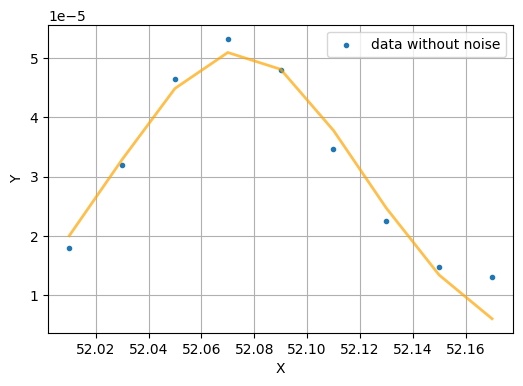

In [133]:
# amplitude, mean, stddev

p0 = [1, 52.09, 0.0516]

# Suposição de incerteza para os dados (não alterada)
#sigma = y * 0  # incertezas zeradas (zero ou 1)

# Ajuste da curva usando a função gaussiana
parametros_ajustados, matriz_covariancia = curve_fit(gauss_model, wave_lenght[i1:i2],media_intervalo[i1:i2], p0=p0, maxfev = 5000)

# Obter incertezas nos parâmetros ajustados
perr = np.sqrt(np.diag(matriz_covariancia))

# Modelo ajustado usando os parâmetros ajustados
f_model = gauss_model(wave_lenght[i1:i2], parametros_ajustados[0], parametros_ajustados[1], parametros_ajustados[2])

###############################################################################

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# Dados sem ruído
ax.scatter(wave_lenght[i1:i2], media_intervalo[i1:i2], zorder=2, label='data without noise', marker='.')

# Modelo ajustado
ax.plot(wave_lenght[i1:i2], f_model, color='orange', alpha=0.7, linewidth=2)

# Label mostrando os parâmetros ajustados
label = 'Amplitude={:3.2f}'.format(parametros_ajustados[0]) + '\nMédia={:3.2f}'.format(parametros_ajustados[1])
label += '\nstddev={:3.2f}'.format(parametros_ajustados[2])
ax.annotate(label, (0.7, 1.1))

ax.legend()
plt.show()

# Ferro -> Fe XIX line 59.2nm

In [37]:
w = line_fe_xix
index = find_nearest(wave_lenght,w)

# encontra o indice maximo de irradiacao pra esse comprimento de onda
irradiancia_maxima = irradiance[:,index].argmax()
print(irradiancia_maxima)

irradiancia_maxima= 277


2


0.17217432
55.0


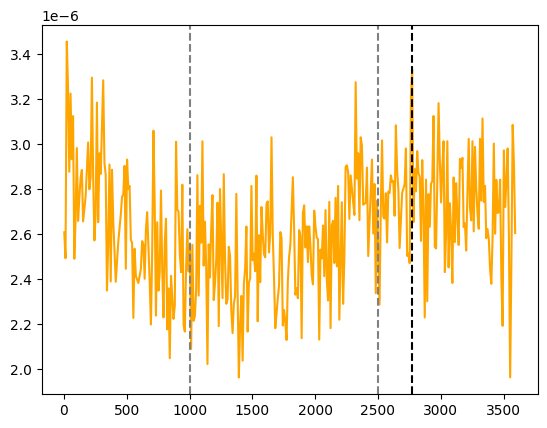

In [38]:
## background interval (index)
inicio_intervalo = find_nearest(time_seconds,1000)
final_intervalo = find_nearest(time_seconds,2500)

##############################

media_intervalo = irradiance[inicio_intervalo:final_intervalo,:].mean(axis=0)
desvio_padrao_intervalo = irradiance[inicio_intervalo:final_intervalo,:].std(axis=0)

plt.plot(time_seconds,irradiance[:,index], color = "orange")

plt.axvline(time_seconds[inicio_intervalo],linestyle='dashed',color='gray')
plt.axvline(time_seconds[final_intervalo],linestyle='dashed',color='gray')
plt.axvline(time_seconds[irradiancia_maxima],linestyle='dashed',color='k')

print(irradiance.std())
print(wave_lenght.mean())

0.14422196
59.190006


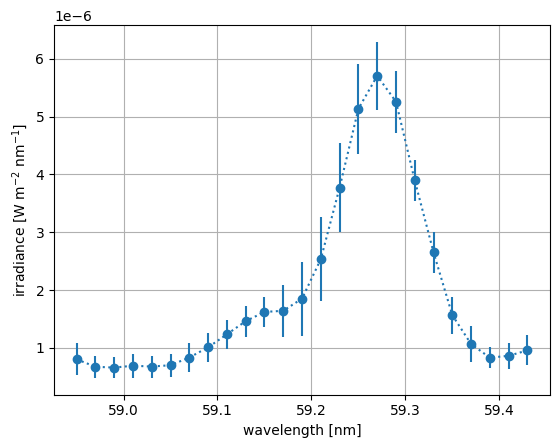

In [39]:
dw = 0.25

i1 = find_nearest(wave_lenght,w-dw)
i2 = find_nearest(wave_lenght,w+dw)
plt.plot(wave_lenght[i1:i2],media_intervalo[i1:i2],marker='o',linestyle='dotted')
# plt.xlim(w-0.2,w+0.2)
plt.errorbar(wave_lenght[i1:i2],media_intervalo[i1:i2],3*desvio_padrao_intervalo[i1:i2],fmt='none')
plt.xlabel('wavelength [nm]')
plt.ylabel(r'irradiance [W m$^{-2}$ nm$^{-1}$]')
plt.grid()


print(wave_lenght[i1:i2].std())
print(wave_lenght[i1:i2].mean())

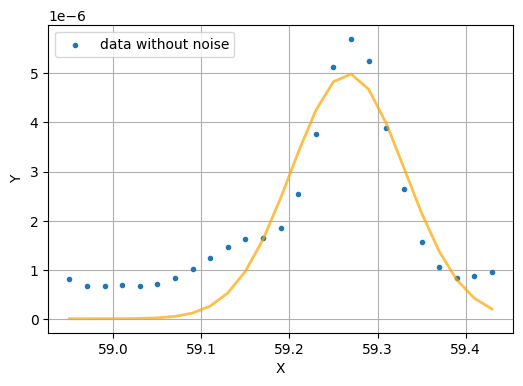

In [40]:
# amplitude, mean, stddev

p0 = [1, 59.19, 0.144]

# Suposição de incerteza para os dados (não alterada)
#sigma = y * 0  # incertezas zeradas (zero ou 1)

# Ajuste da curva usando a função gaussiana
parametros_ajustados, matriz_covariancia = curve_fit(gauss_model, wave_lenght[i1:i2],media_intervalo[i1:i2], p0=p0, maxfev = 5000)

# Obter incertezas nos parâmetros ajustados
perr = np.sqrt(np.diag(matriz_covariancia))

# Modelo ajustado usando os parâmetros ajustados
f_model = gauss_model(wave_lenght[i1:i2], parametros_ajustados[0], parametros_ajustados[1], parametros_ajustados[2])

###############################################################################

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# Dados sem ruído
ax.scatter(wave_lenght[i1:i2], media_intervalo[i1:i2], zorder=2, label='data without noise', marker='.')

# Modelo ajustado
ax.plot(wave_lenght[i1:i2], f_model, color='orange', alpha=0.7, linewidth=2)

# Label mostrando os parâmetros ajustados
label = 'Amplitude={:3.2f}'.format(parametros_ajustados[0]) + '\nMédia={:3.2f}'.format(parametros_ajustados[1])
label += '\nstddev={:3.2f}'.format(parametros_ajustados[2])
ax.annotate(label, (0.7, 1.1))

ax.legend()
plt.show()